In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

df = pd.read_csv('training_data_imputed.csv')
df.head()


,SO2,CO,O3,O3_8hr,PM10,PM2.5,NO2,NOx,NO,WindSpeed,WindDirec,DataCreationDate,CO_8hr,PM2.5_AVG,PM10_AVG,SO2_AVG,AQI,Pollutant
0,5.2,0.37,50.0,80,51,29,19.0,21.0,1.6,2.1,E,9/28/2017 16:00,0.5,37,60,5,128.0,1
1,4.6,0.25,72.0,68,46,21,12.0,14.0,1.2,3.7,N,9/28/2017 16:00,0.4,30,57,5,100.0,1
2,3.8,0.29,74.0,59,56,39,7.7,8.8,1.1,2.4,W,9/28/2017 15:00,0.4,32,55,4,96.0,1
3,1.8,0.17,51.0,50,36,23,3.3,4.8,1.5,2.7,W,9/28/2017 15:00,0.3,27,44,2,83.0,1
4,2.6,0.12,33.0,31,33,22,4.5,5.4,1.0,2.7,W,9/28/2017 15:00,0.2,22,39,3,75.0,1


In [2]:
# Suppose ton dataset est dans df
numeric_features = ['SO2','CO','O3','PM10','PM2.5','NO2','NOx','NO',
                    'WindSpeed','CO_8hr','PM2.5_AVG','PM10_AVG','SO2_AVG','AQI','Pollutant']
categorical_features = ['WindDirec']

# Prétraitement
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

X_processed = preprocessor.fit_transform(df)

In [5]:
X = df[numeric_features].dropna()

# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA sans fixer n_components
pca = PCA()
pca.fit(X_scaled)

# Variance expliquée par chaque composante
explained_variance = pca.explained_variance_ratio_

# Variance cumulée
cumulative_variance = explained_variance.cumsum()

print("Variance expliquée par chaque composante:", explained_variance)
print("Variance cumulée:", cumulative_variance)


Variance expliquée par chaque composante: [4.13144488e-01 2.16318450e-01 8.95641416e-02 6.96180773e-02
 4.52297391e-02 3.51959088e-02 3.15668072e-02 2.89052777e-02
 2.47964565e-02 2.00170566e-02 1.15601353e-02 8.74241097e-03
 3.28816674e-03 2.02738794e-03 2.54969041e-05]
Variance cumulée: [0.41314449 0.62946294 0.71902708 0.78864516 0.8338749  0.8690708
 0.90063761 0.92954289 0.95433935 0.9743564  0.98591654 0.99465895
 0.99794712 0.9999745  1.        ]


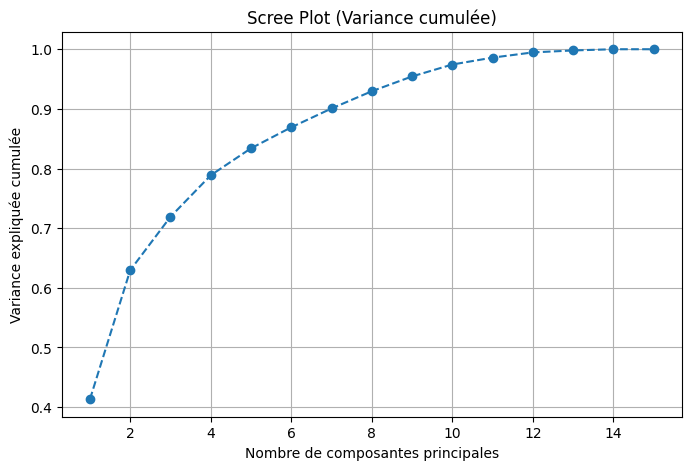

In [6]:
# Graphique Scree plot
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance expliquée cumulée')
plt.title('Scree Plot (Variance cumulée)')
plt.grid(True)
plt.show()

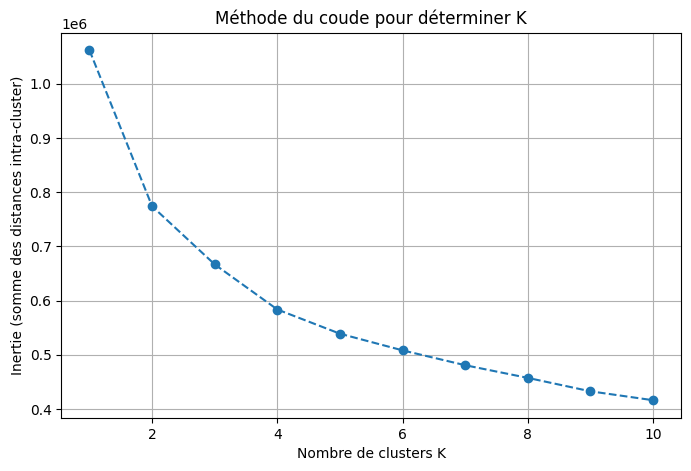

In [11]:
# Standardisation (si pas déjà faite)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calcul de l'inertie pour différents K
inertias = []
K_range = range(1, 11)  # tester K de 1 à 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)  # somme des distances intra-cluster

# Graphe du coude
plt.figure(figsize=(8,5))
plt.plot(K_range, inertias, marker='o', linestyle='--')
plt.xlabel('Nombre de clusters K')
plt.ylabel('Inertie (somme des distances intra-cluster)')
plt.title('Méthode du coude pour déterminer K')
plt.grid(True)
plt.show()

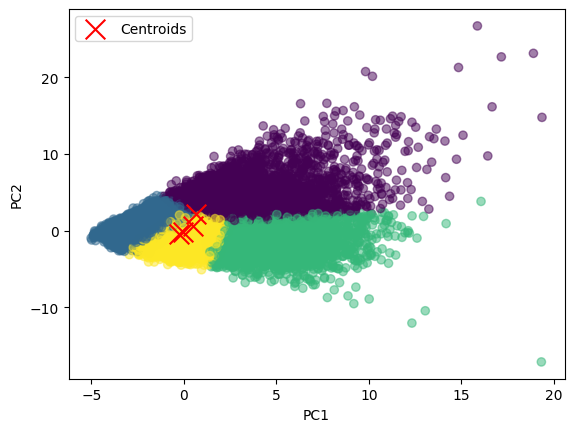

In [10]:
# PCA pour visualisation
#pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# K-means
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Visualisation
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            c='red', marker='x', s=200, label='Centroids')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()